In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def iniciar():
    # abrindo a nova imagem
    imagem = np.array(cv2.imread('imagens/livingroom.tif', cv2.IMREAD_GRAYSCALE))
    linhas, colunas = imagem.shape
    # chamar o método
    filtragemPassaAlta(imagem, linhas, colunas)

In [3]:
def filtragemPassaAlta(imagem, linhas, colunas):
    # transformada na imagem
    imagemDFT = np.fft.fft2(imagem)

    # DC, n/2 nas duas direções
    imagemDFTShift = np.fft.fftshift(imagemDFT)

    # representação gráfica do espectro
    espectro_magnitude = 20*np.log(np.abs(imagemDFTShift))

    # deixando no padrão de 8 bits - uint8
    espectro_magnitude = np.asarray(espectro_magnitude, dtype=np.uint8)
    # Plotagem
    plt.rcParams['figure.figsize'] = (16,16)
    plt.subplot(1, 2, 1)
    plt.imshow(imagem, 'gray')
    plt.title("Imagem original")
    
    plt.subplot(1, 2, 2)
    plt.imshow(espectro_magnitude, 'gray')
    plt.title("Espectro da imagem original")
    plt.show()
    
    # filtro Sobel
    laplaciano=np.array([[-1, -1, -1],
                        [-1, 8, -1],
                        [-1, -1, -1]])
    
    kernel = laplaciano    

    filter_dft = np.fft.fft2(kernel, [linhas, colunas])   
    filter_dft_shift = np.fft.fftshift(filter_dft)
    filter_dft_mag = np.abs(filter_dft_shift)   
    
    # visualização   
    plt.rcParams['figure.figsize'] = (8,8)
    plt.imshow(filter_dft_mag, 'gray')
    plt.title("Espectro da frequência do filtro Laplaciano")
    plt.show()
    
    # aplicação do filtro
    filter_img = imagemDFTShift * filter_dft_mag
    filter_img_mag = 20*np.log(np.abs(filter_img+1))

    img_back = np.fft.ifft2(filter_img)
    
    img_back_mag = np.abs(img_back)
    
    plt.rcParams['figure.figsize'] = (16,16)
    plt.subplot(1, 2, 1)
    plt.imshow(img_back_mag, 'gray')
    plt.title("Aplicação do filtro na imagem no domínio da frequência")

    plt.subplot(1, 2, 2)
    plt.imshow(filter_img_mag, 'gray')
    plt.title("Imagem no domínio da frequência")
    plt.show()

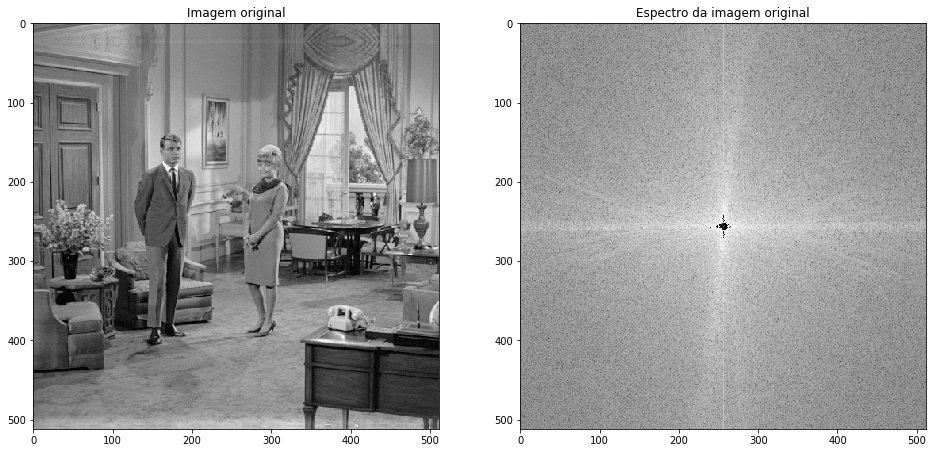

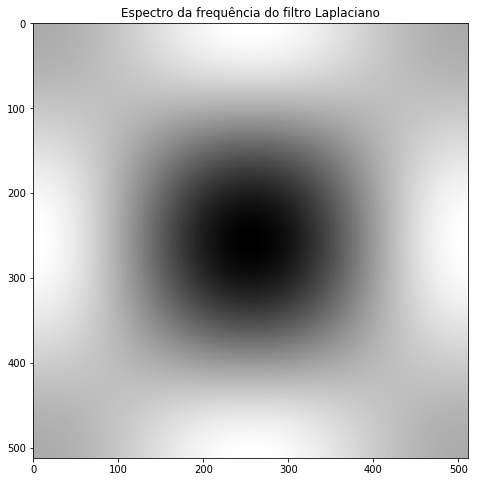

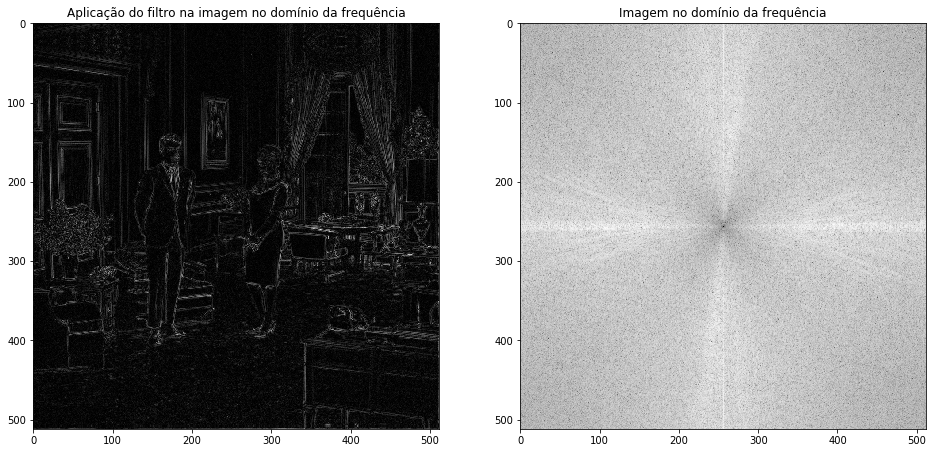

In [4]:
iniciar()